İzlenme Sayısı: 7911221


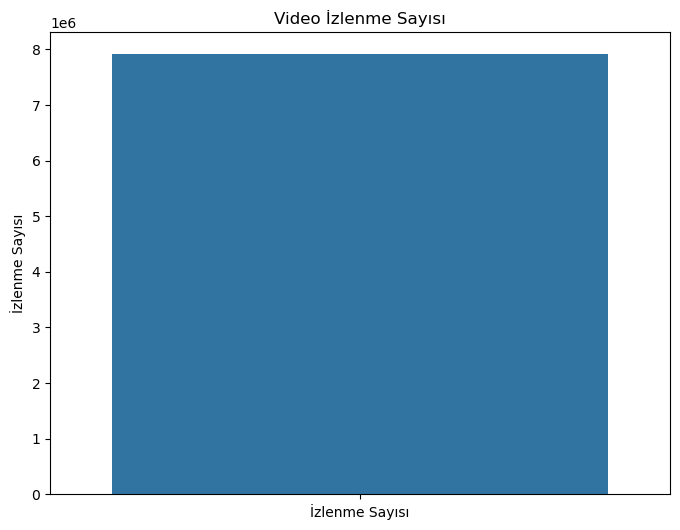

In [9]:
from googleapiclient.discovery import build
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import JSON
from config import YOUTUBE_API_KEY
from api_methods import get_channel_stats, get_video_ids
from datetime import datetime



# YouTube API'nin kullanılacağı proje bilgilerini belirtin
youtube = build('youtube', 'v3', developerKey=YOUTUBE_API_KEY)

# Video ID'si
video_id = 'zvxNkUoKbA0'  # İzlenme istatistiği almak istediğiniz video ID'si

# İzlenme istatistiklerini al
request = youtube.videos().list(
    part='statistics',
    id=video_id
)
response = request.execute()

# İzlenme istatistikleri
statistics = response['items'][0]['statistics']
view_count = int(statistics['viewCount'])

print(f"İzlenme Sayısı: {view_count}")

# Verileri grafiğe dökme
data = {
    'İzlenme Sayısı': view_count
}

# Zaman grafiği oluşturma
plt.figure(figsize=(8, 6))
sns.barplot(x=list(data.keys()), y=list(data.values()))
plt.title('Video İzlenme Sayısı')
plt.ylabel('İzlenme Sayısı')
plt.show()


##### The YouTube API does not return a video's view statistics based on a specific date. Instead, it gives the total number of views. If you want to get the viewing statistics of a video at certain date intervals, you will need to store the daily viewing data provided by the API. You may need to collect and store this data yourself.

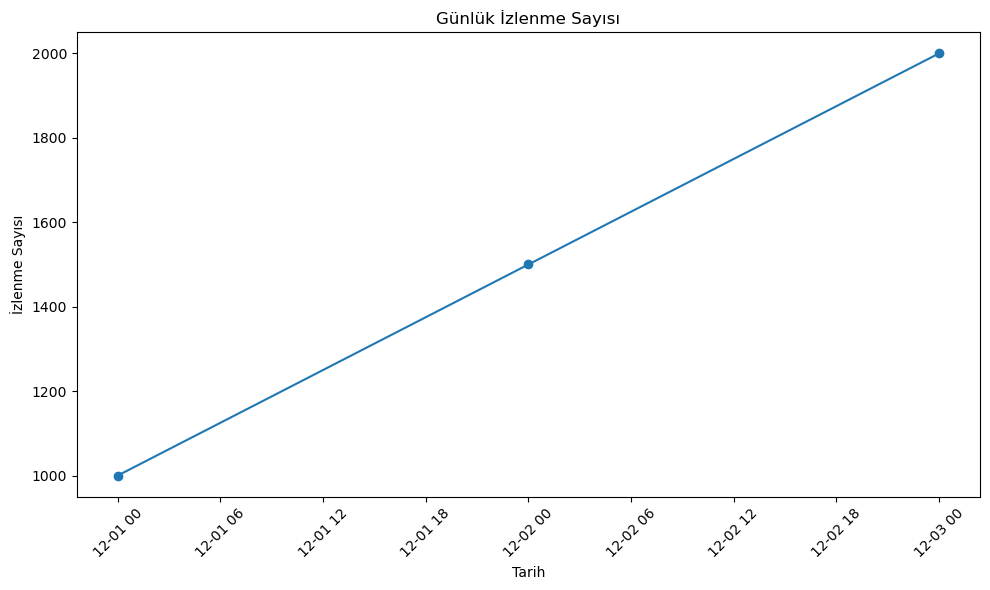

In [11]:

# Example Date about view count 
dates = ["2023-12-01", "2023-12-02", "2023-12-03"]  # Dates
view_counts = [1000, 1500, 2000]  # Views


# Turn dates into datetime objects
dates = [datetime.strptime(date, "%Y-%m-%d") for date in dates]

plt.figure(figsize=(10, 6))
plt.plot(dates, view_counts, marker='o')
plt.title('Günlük İzlenme Sayısı')
plt.xlabel('Tarih')
plt.ylabel('İzlenme Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Sentiment Analysis with NLP

In [13]:

# API call to fetch comments
request = youtube.commentThreads().list(
    part="snippet",
    videoId=video_id,
    maxResults=100  # Limiting to a specific number of comments
)
response = request.execute()

In [14]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [15]:
# Download NLTK resources (run this once)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yason\AppData\Roaming\nltk_data...


True

##### Turkish video

In [16]:
# Fetch comments for a video
def get_video_comments(video_id):
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100  # Limiting to a specific number of comments
    )
    response = request.execute()
    comments = [item['snippet']['topLevelComment']['snippet']['textOriginal'] for item in response['items']]
    return comments



# Get comments for the video
comments = get_video_comments(video_id)

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
positive_count = 0
negative_count = 0
neutral_count = 0

for comment in comments:
    sentiment_score = sia.polarity_scores(comment)['compound']
    if sentiment_score >= 0.05:
        positive_count += 1
    elif sentiment_score <= -0.05:
        negative_count += 1
    else:
        neutral_count += 1

total_comments = len(comments)
print(f"Total Comments: {total_comments}")
print(f"Positive Comments: {positive_count}")
print(f"Negative Comments: {negative_count}")
print(f"Neutral Comments: {neutral_count}")

Total Comments: 100
Positive Comments: 3
Negative Comments: 0
Neutral Comments: 97


##### English video

In [20]:


# Fetch comments for a video
def get_video_comments(video_id):
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100  # Limiting to a specific number of comments
    )
    response = request.execute()
    comments = [item['snippet']['topLevelComment']['snippet']['textOriginal'] for item in response['items']]
    return comments

# Example video ID
video_id = 'lOKASgtr6kU'

# Get comments for the video
comments = get_video_comments(video_id)

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
positive_count = 0
negative_count = 0
neutral_count = 0

for comment in comments:
    sentiment_score = sia.polarity_scores(comment)['compound']
    if sentiment_score >= 0.05:
        positive_count += 1
    elif sentiment_score <= -0.05:
        negative_count += 1
    else:
        neutral_count += 1

total_comments = len(comments)
print(f"Total Comments: {total_comments}")
print(f"Positive Comments: {positive_count}")
print(f"Negative Comments: {negative_count}")
print(f"Neutral Comments: {neutral_count}")


Total Comments: 100
Positive Comments: 39
Negative Comments: 2
Neutral Comments: 59


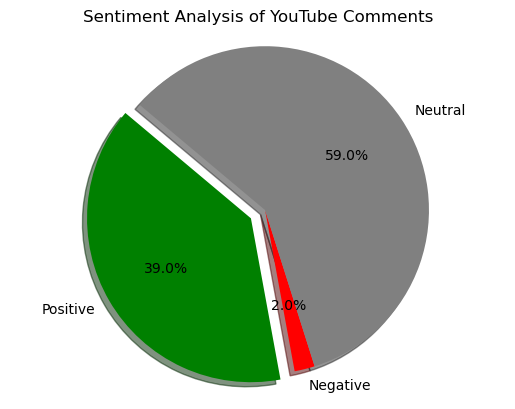

In [21]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['green', 'red', 'grey']
explode = (0.1, 0, 0)  # explode the 1st slice (Positive)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Analysis of YouTube Comments')
plt.show()

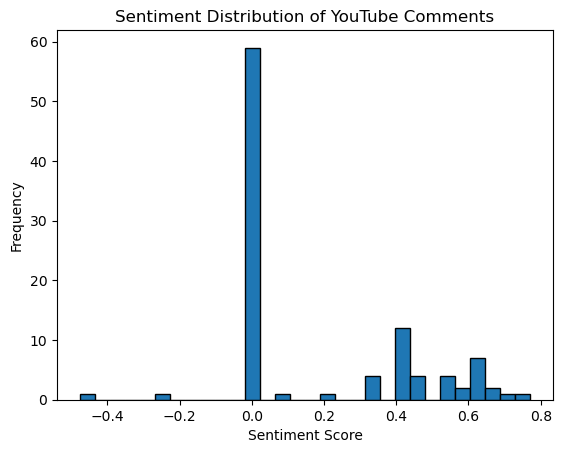

In [23]:
# Sentiment analysis
sia = SentimentIntensityAnalyzer()
sentiment_scores = []

for comment in comments:
    sentiment_score = sia.polarity_scores(comment)['compound']
    sentiment_scores.append(sentiment_score)

# Plotting sentiment distribution
plt.hist(sentiment_scores, bins=30, edgecolor='black')
plt.title('Sentiment Distribution of YouTube Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

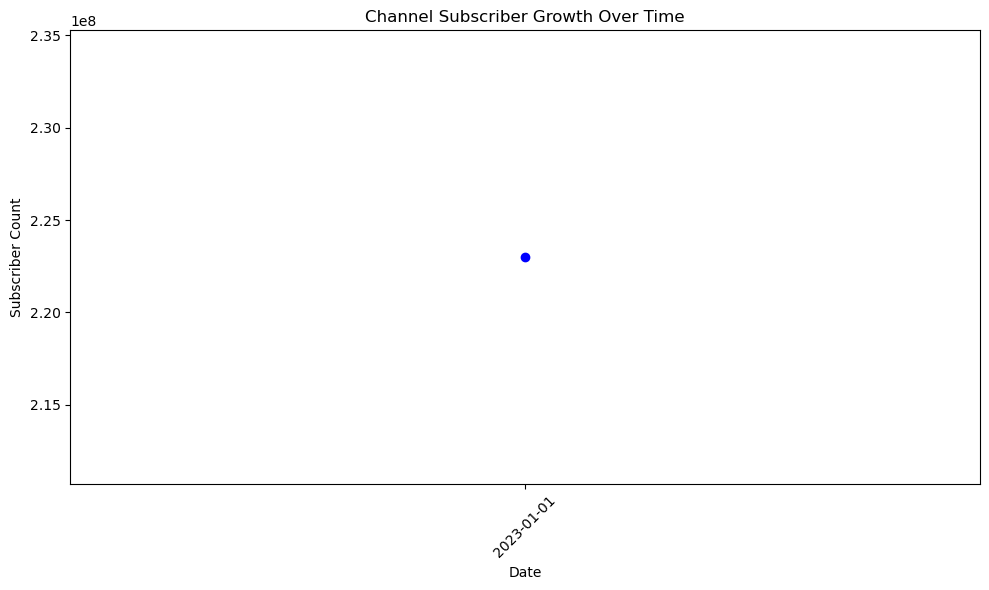

In [24]:

# Example channel ID
channel_id = 'UCX6OQ3DkcsbYNE6H8uQQuVA'

# Fetch channel subscriber counts over time
request = youtube.channels().list(
    part="statistics",
    id=channel_id
)
response = request.execute()

# Extract subscriber counts and dates (you need to implement the logic to fetch data at different time intervals)
subscriber_counts = [int(response['items'][0]['statistics']['subscriberCount'])]  # Assuming just one data point
dates = ['2023-01-01']  # Corresponding dates (e.g., for each data point)

# Plotting channel subscriber growth over time
plt.figure(figsize=(10, 6))
plt.plot(dates, subscriber_counts, marker='o', linestyle='-', color='b')
plt.title('Channel Subscriber Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Subscriber Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


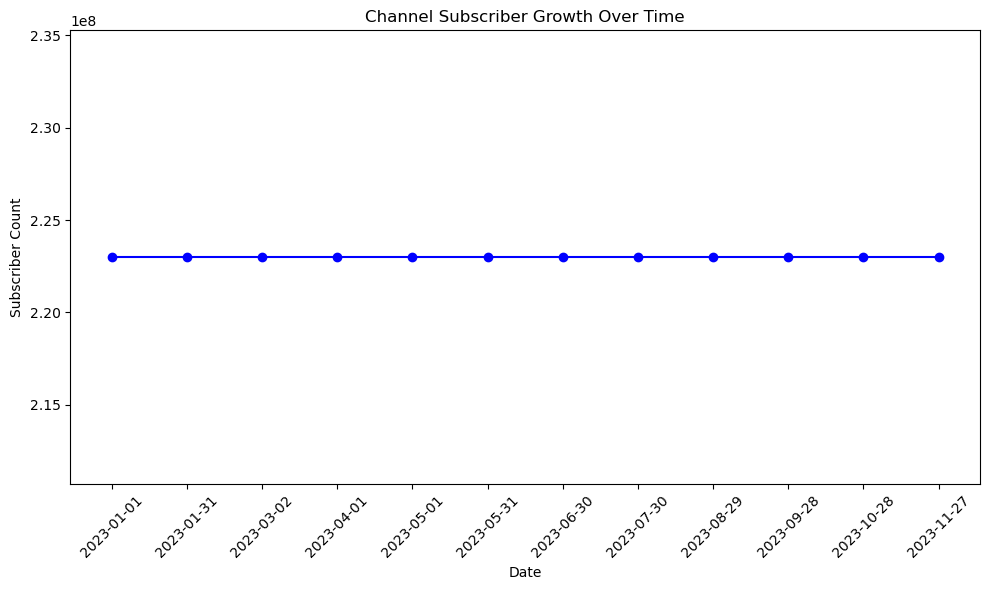

In [28]:
from datetime import timedelta


# Example channel ID
channel_id = 'UCX6OQ3DkcsbYNE6H8uQQuVA'

# Function to fetch current subscriber count
def fetch_subscriber_count(channel_id):
    request = youtube.channels().list(
        part="statistics",
        id=channel_id
    )
    response = request.execute()
    return int(response['items'][0]['statistics']['subscriberCount'])

# Generating dates at intervals (e.g., monthly) for a year
start_date = datetime.strptime('2023-01-01', "%Y-%m-%d")  # Start date
end_date = datetime.strptime('2023-12-31', "%Y-%m-%d")  # End date
date_intervals = [start_date + timedelta(days=30 * i) for i in range(12)]  # Monthly intervals

# Fetching subscriber counts at specified intervals
subscriber_counts = []
dates = []
for date in date_intervals:
    count = fetch_subscriber_count(channel_id)
    subscriber_counts.append(count)
    dates.append(date.strftime('%Y-%m-%d'))

# Plotting channel subscriber growth over time
plt.figure(figsize=(10, 6))
plt.plot(dates, subscriber_counts, marker='o', linestyle='-', color='b')
plt.title('Channel Subscriber Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Subscriber Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### This code snippet fetches the subscriber count for a specific channel at regular intervals.Apparently Youtube not supporting.

#### Next step will be Machine Learning